In [1]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

# Get the data
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv


--2023-08-11 04:48:29--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-08-11 04:48:29 (38.9 MB/s) - ‘moore.csv’ saved [2302/2302]



In [5]:

# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1)


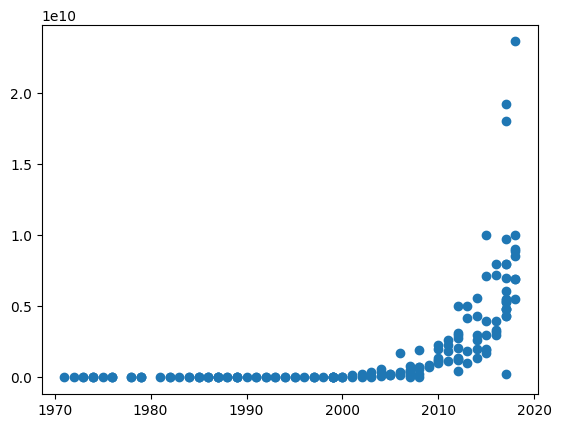

In [7]:

# make it a 2-D array of size N x D where D = 1
Y = data[:,1].reshape(-1, 1)
# Plot the data - it is exponential!
plt.scatter(X, Y)


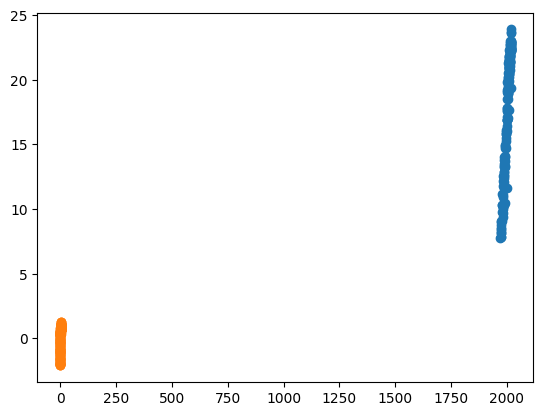

In [8]:



# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y);
# that's better

# Scale and center both the x and y axes
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X - mx)/sx
Y = (Y - my)/sy
# Everything is centered and in a small range
plt.scatter(X, Y);

# Cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)
# Create the linear regression model
model = nn.Linear(1, 1)
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.7)
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)
type(inputs)
torch.Tensor
# Train the model
n_epochs = 100
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # Record the loss
  losses.append(loss.item())
    # Backward and optimize
  loss.backward()
  optimizer.step()


In [9]:

  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')



Epoch 100/100, Loss: 0.0385


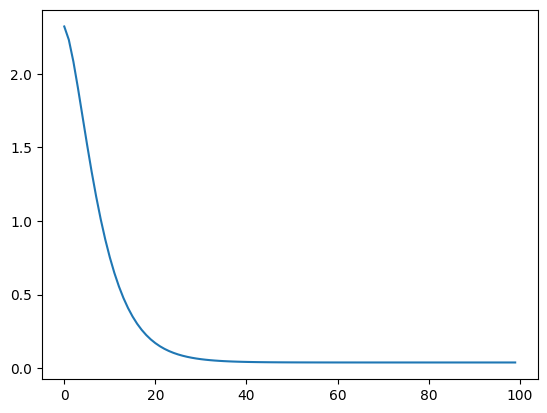

In [10]:

# Loss per iteration
plt.plot(losses);


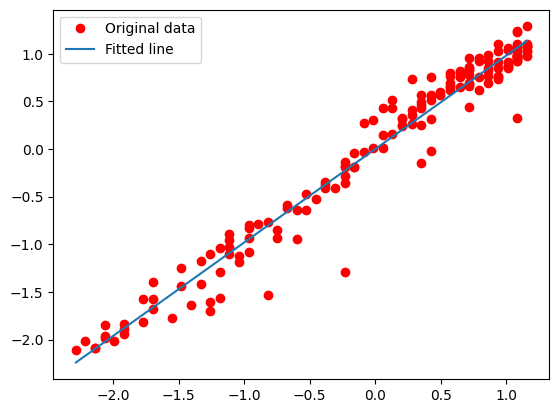

In [11]:

# Plot the graph
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()


In [12]:

# What does this mean?
w = model.weight.data.numpy()
print(w)
[[0.98055273]]


[[0.9802823]]


[[0.98055273]]